# Data import and visualization

In [37]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import imblearn
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use("Solarize_Light2")


#common imports

In [38]:
data=pd.read_csv("C:/Users/frame/OneDrive\Desktop\CSV-Hall-of-fame-train.csv") #substitute this with path of the dataset on your device
data.head()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1,408,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,...,1125.0,153.0,45.0,9,1,1982,1990,1.0,14.0,0
1,1,51,NaN,587.0,NaN,NaN,NaN,158.0,NaN,NaN,...,143.0,NaN,NaN,1,1,1949,1949,1.0,55.0,0
2,1,265,NaN,1712.0,NaN,NaN,72.0,311.0,NaN,NaN,...,402.0,NaN,NaN,5,1,1946,1950,1.0,54.0,0
3,1,133,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,...,102.0,349.0,134.0,2,1,2003,2004,NaN,NaN,0
4,1,8,28.0,7.0,NaN,2.0,2.0,NaN,NaN,NaN,...,3.0,NaN,NaN,1,1,2004,2004,NaN,NaN,0


In [39]:
imp = KNNImputer(n_neighbors=2, weights="uniform")
print(imp.fit_transform(data))

[[1.0000e+00 4.0800e+02 9.8250e+03 ... 1.0000e+00 1.4000e+01 0.0000e+00]
 [1.0000e+00 5.1000e+01 9.3500e+02 ... 1.0000e+00 5.5000e+01 0.0000e+00]
 [1.0000e+00 2.6500e+02 1.0000e+00 ... 1.0000e+00 5.4000e+01 0.0000e+00]
 ...
 [1.0000e+00 8.1400e+02 1.9241e+04 ... 1.0000e+00 3.0000e+01 0.0000e+00]
 [1.0000e+00 9.8000e+01 1.2200e+03 ... 1.0000e+00 2.0000e+00 0.0000e+00]
 [1.0000e+00 9.9000e+01 1.3010e+03 ... 1.0000e+00 4.8000e+01 0.0000e+00]]


In [40]:
idf = pd.DataFrame(imp.fit_transform(data))
idf.columns=data.columns
idf.index=data.index
idf.head()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1.0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,...,1125.0,153.0,45.0,9.0,1.0,1982.0,1990.0,1.0,14.0,0.0
1,1.0,51.0,935.0,587.0,77.0,149.0,188.5,158.0,77.5,13.0,...,143.0,13.0,2.5,1.0,1.0,1949.0,1949.0,1.0,55.0,0.0
2,1.0,265.0,1.0,1712.0,175.0,311.0,72.0,311.0,264.0,32.5,...,402.0,361.0,103.0,5.0,1.0,1946.0,1950.0,1.0,54.0,0.0
3,1.0,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,...,102.0,349.0,134.0,2.0,1.0,2003.0,2004.0,1.0,49.5,0.0
4,1.0,8.0,28.0,7.0,1.5,2.0,2.0,2.0,1.0,2.0,...,3.0,3.0,2.0,1.0,1.0,2004.0,2004.0,1.0,7.5,0.0


In [41]:
data = idf
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   league          495 non-null    float64
 1   games           495 non-null    float64
 2   minutes         495 non-null    float64
 3   pts             495 non-null    float64
 4   offReb          495 non-null    float64
 5   defReb          495 non-null    float64
 6   reb             495 non-null    float64
 7   asts            495 non-null    float64
 8   stl             495 non-null    float64
 9   blk             495 non-null    float64
 10  turnover        495 non-null    float64
 11  pf              495 non-null    float64
 12  fga             495 non-null    float64
 13  fgm             495 non-null    float64
 14  fta             495 non-null    float64
 15  ftm             495 non-null    float64
 16  tpa             495 non-null    float64
 17  tpm             495 non-null    flo

In [42]:
data.describe()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0,495.000000,495.000000
mean,0.860606,279.462626,6946.015152,3249.532323,335.208081,716.220202,1388.336364,731.658586,211.879798,117.340404,...,713.523232,213.818182,79.621212,5.357576,1.957576,1974.947475,1979.305051,1.0,27.418182,0.090909
std,0.346708,303.704033,9687.577828,5068.871384,636.867177,1207.201084,2579.085462,1293.805720,308.812715,244.338148,...,1185.164303,508.567204,185.759818,4.461647,0.915575,16.935973,17.555634,0.0,16.109974,0.287771
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1946.000000,1946.000000,1.0,1.000000,0.000000
25%,1.000000,46.000000,402.000000,143.000000,26.500000,48.000000,72.250000,29.000000,14.000000,4.500000,...,29.000000,5.000000,2.000000,1.000000,1.000000,1963.000000,1968.000000,1.0,14.000000,0.000000
50%,1.000000,151.000000,2222.000000,907.000000,99.000000,246.000000,395.000000,190.000000,73.000000,23.000000,...,199.000000,18.000000,9.000000,4.000000,2.000000,1974.000000,1979.000000,1.0,27.000000,0.000000
75%,1.000000,439.000000,10102.500000,4115.000000,367.000000,864.500000,1632.000000,881.500000,296.500000,107.250000,...,798.000000,140.000000,54.000000,9.000000,3.000000,1989.000000,1995.000000,1.0,37.000000,0.000000
max,1.000000,1611.000000,47859.000000,31419.000000,6731.000000,10117.000000,23924.000000,9887.000000,2207.000000,2361.000000,...,8531.000000,3434.000000,1301.000000,21.000000,3.000000,2004.000000,2004.000000,1.0,58.000000,1.000000


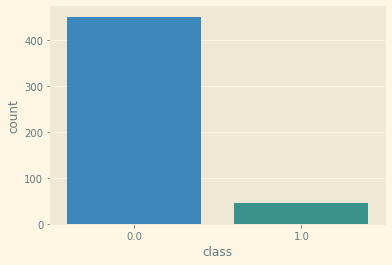

In [43]:
sns.countplot(x="class", data=data)
plt.show()

Targer class is heavily unbalanced.

In [44]:
sm = SMOTE(random_state=42)
sm.fit_resample(data, data['class'])
pd.DataFrame(sm.fit_resample(data, data['class'])[0])

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004,class
0,1.0,408.000000,9825.000000,5232.000000,476.000000,824.000000,1300.000000,866.000000,265.000000,175.000000,...,1125.000000,153.000000,45.000000,9.000000,1.000000,1982.000000,1990.000000,1.0,14.000000,0.0
1,1.0,51.000000,935.000000,587.000000,77.000000,149.000000,188.500000,158.000000,77.500000,13.000000,...,143.000000,13.000000,2.500000,1.000000,1.000000,1949.000000,1949.000000,1.0,55.000000,0.0
2,1.0,265.000000,1.000000,1712.000000,175.000000,311.000000,72.000000,311.000000,264.000000,32.500000,...,402.000000,361.000000,103.000000,5.000000,1.000000,1946.000000,1950.000000,1.0,54.000000,0.0
3,1.0,133.000000,2587.000000,992.000000,55.000000,198.000000,253.000000,291.000000,123.000000,14.000000,...,102.000000,349.000000,134.000000,2.000000,1.000000,2003.000000,2004.000000,1.0,49.500000,0.0
4,1.0,8.000000,28.000000,7.000000,1.500000,2.000000,2.000000,2.000000,1.000000,2.000000,...,3.000000,3.000000,2.000000,1.000000,1.000000,2004.000000,2004.000000,1.0,7.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,105.717580,3458.833173,2094.630373,139.533800,229.577947,920.486009,551.002366,177.784391,18.896778,...,518.175799,32.696098,33.929001,12.402148,3.000000,1960.793555,1972.195704,1.0,31.804296,1.0
896,1.0,896.579875,32335.064663,14146.108673,281.907007,914.934486,10793.012061,2515.912699,81.063289,163.629839,...,2799.581816,66.662803,59.848647,12.484941,2.757529,1962.242471,1973.727412,1.0,30.272588,1.0
897,1.0,924.538486,30022.570331,17093.006156,317.729785,890.136080,4250.205970,6050.073501,476.653784,109.307892,...,4359.603147,96.983268,68.000000,18.115297,1.000000,1954.577135,1971.692432,1.0,32.307568,1.0
898,1.0,545.783236,16515.650953,8287.706204,648.352771,1444.944518,3759.343584,1705.653138,357.185249,154.904694,...,2309.998577,63.958256,19.313328,9.377284,3.000000,1962.095306,1970.472590,1.0,33.527410,1.0


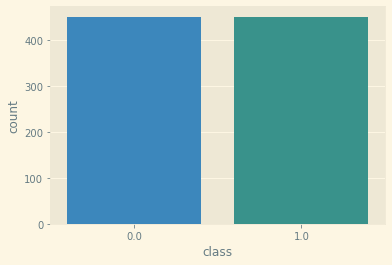

In [45]:
data = pd.DataFrame(sm.fit_resample(data, data['class'])[0])
sns.countplot(x="class", data=data)
plt.show()

In [112]:
data.to_csv(r'C:/Users/frame/OneDrive/Desktop/Weka projects/NBA_data_fixed.csv', index=False)

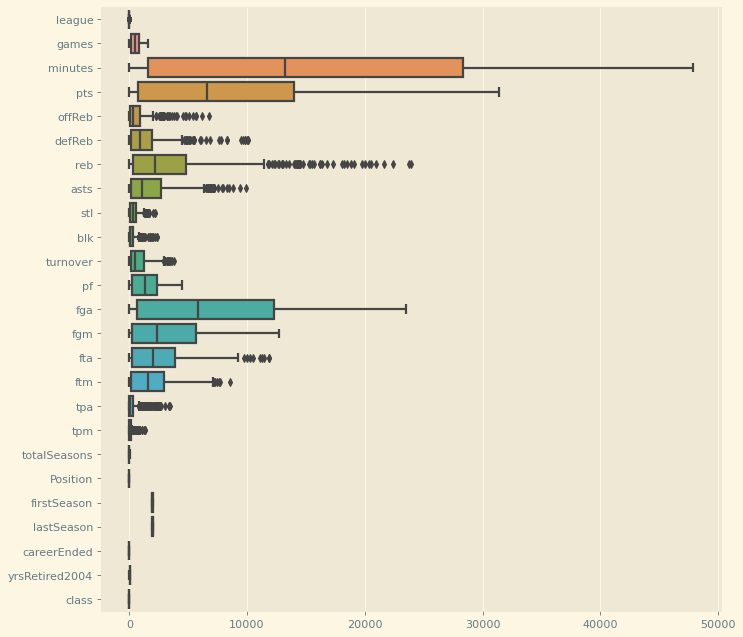

In [46]:
plt.figure(figsize=(10,10), dpi=80)
sns.boxplot(data=data, orient="h")
plt.show()

Boxplot graph is useful to show outliers.

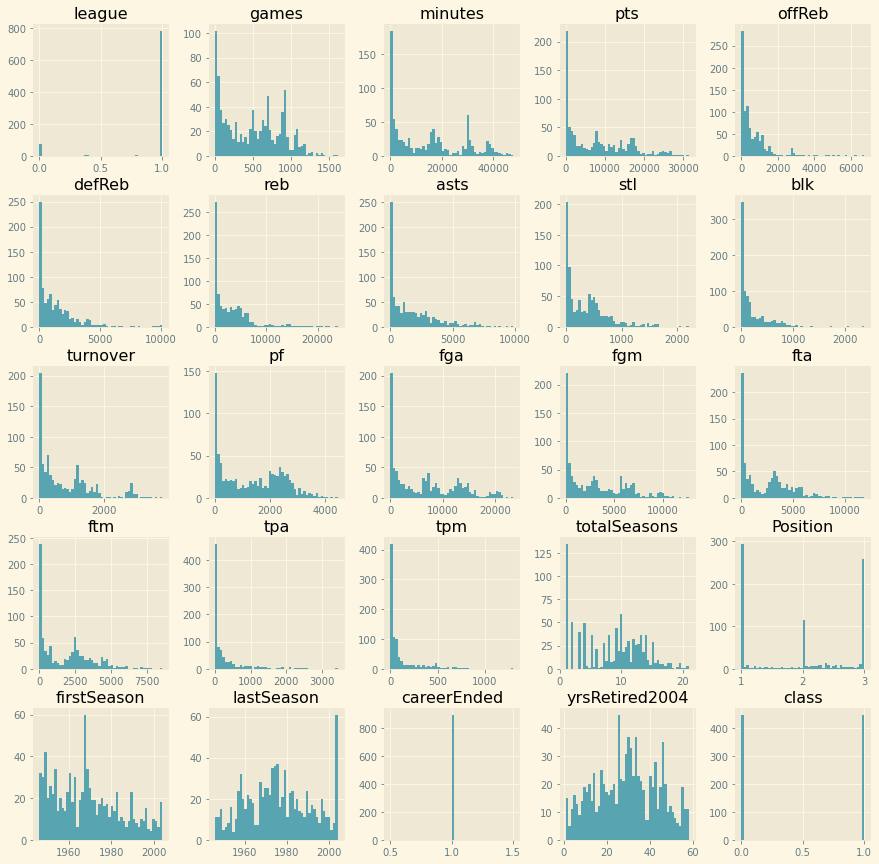

In [47]:
data.hist(bins=50,figsize=(15,15), color='#58A4B0', )
plt.show()

Data is definetly not standardized.

In [48]:
corr_matrix = data.corr()
corr_matrix["class"].sort_values(ascending=False)

class             1.000000
ftm               0.784146
fta               0.772113
pf                0.764651
fga               0.764621
pts               0.750183
fgm               0.735406
minutes           0.718829
totalSeasons      0.716189
games             0.706401
asts              0.633031
reb               0.610943
turnover          0.589696
stl               0.514398
defReb            0.498579
offReb            0.444082
blk               0.431398
tpm               0.247852
tpa               0.228429
yrsRetired2004    0.151676
league            0.149410
Position          0.033719
lastSeason       -0.237358
firstSeason      -0.466003
careerEnded            NaN
Name: class, dtype: float64

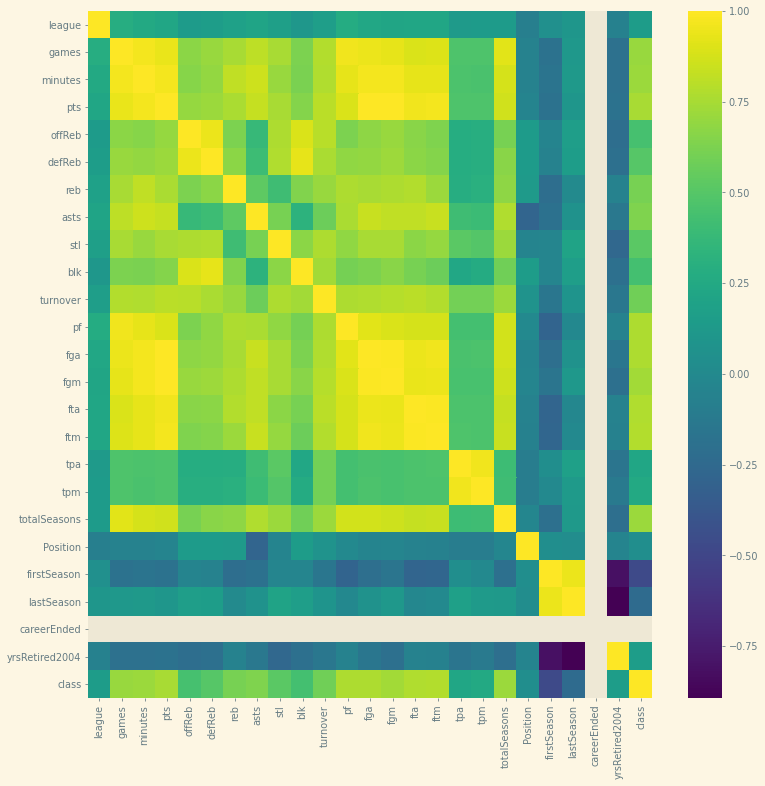

In [49]:
plt.figure(figsize=(13,13), dpi=70)
sns.heatmap(corr_matrix, cmap="viridis", annot=False)
plt.show()

I start dividing the sample data into features and targets:

In [50]:
df = data.iloc[:, :-1]
df.head()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
0,1.0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,...,1495.0,1125.0,153.0,45.0,9.0,1.0,1982.0,1990.0,1.0,14.0
1,1.0,51.0,935.0,587.0,77.0,149.0,188.5,158.0,77.5,13.0,...,181.0,143.0,13.0,2.5,1.0,1.0,1949.0,1949.0,1.0,55.0
2,1.0,265.0,1.0,1712.0,175.0,311.0,72.0,311.0,264.0,32.5,...,620.0,402.0,361.0,103.0,5.0,1.0,1946.0,1950.0,1.0,54.0
3,1.0,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,...,130.0,102.0,349.0,134.0,2.0,1.0,2003.0,2004.0,1.0,49.5
4,1.0,8.0,28.0,7.0,1.5,2.0,2.0,2.0,1.0,2.0,...,5.0,3.0,3.0,2.0,1.0,1.0,2004.0,2004.0,1.0,7.5


In [110]:
targets = data.iloc[:,-1]
targets.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

# Data preparation


In [52]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, -1] 
test_targets =  test_data.iloc[:, -1]

training_data.drop(columns=["class"], inplace=True)
test_data.drop(columns=["class"], inplace=True)

I split the data set into training (80%) and test data (20%) 

In [53]:
training_data

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
321,1.000000,3.000000,13.000000,2.000000,1.500000,1.000000,1.000000,1.000000,1.500000,1.500000,...,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2000.000000,2000.000000,1.0,4.000000
629,0.899222,465.449430,15845.909175,9324.922026,1164.201375,2419.675412,4290.947713,929.584588,566.171160,211.877331,...,3400.541704,2650.293830,44.148001,11.116519,7.907002,3.000000,1954.814004,1961.721006,1.0,42.278994
233,1.000000,58.000000,1050.000000,320.000000,37.500000,84.500000,178.000000,114.000000,43.000000,9.000000,...,137.000000,106.000000,45.000000,12.500000,1.000000,1.000000,1961.000000,1961.000000,1.0,43.000000
454,1.000000,3.000000,10.000000,4.000000,1.500000,2.000000,2.000000,1.500000,2.000000,1.000000,...,6.000000,4.000000,1.000000,2.000000,1.000000,3.000000,1989.000000,1989.000000,1.0,15.000000
173,1.000000,598.000000,7036.000000,5859.000000,366.000000,539.000000,2294.000000,940.000000,256.000000,96.500000,...,2211.000000,1499.000000,268.500000,86.000000,10.000000,2.000000,1946.000000,1955.000000,1.0,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,1.000000,644.410302,21283.186738,8504.654016,1366.532600,2873.739779,5687.373285,2463.498026,356.763477,758.308941,...,3112.802855,2377.017667,71.983907,16.808527,10.116653,1.294449,1953.822204,1962.938858,1.0,41.061142
360,1.000000,569.000000,13353.000000,5545.000000,903.000000,1214.000000,2117.000000,853.000000,455.000000,163.000000,...,1642.000000,1292.000000,36.000000,3.000000,8.000000,3.000000,1980.000000,1987.000000,1.0,17.000000
485,1.000000,12.000000,97.000000,28.000000,9.000000,8.000000,17.000000,4.000000,3.000000,3.000000,...,12.000000,10.000000,2.500000,1.000000,1.000000,3.000000,1978.000000,1978.000000,1.0,26.000000
122,1.000000,476.000000,9189.000000,3823.000000,134.000000,543.000000,677.000000,1661.000000,353.000000,40.000000,...,868.000000,712.000000,48.000000,3.000000,8.000000,1.000000,1978.000000,1985.000000,1.0,19.000000


# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [56]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
training_scaled_data.columns = list(df.columns)

test_scaled_data= pd.DataFrame(scaler.transform(test_data))
test_scaled_data.columns = list(df.columns)

df_st = np.concatenate((training_scaled_data.copy(), test_scaled_data.copy()), axis = 0) #to store all the standadized data for later

training_scaled_data

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
0,0.341544,-1.339543,-1.108225,-1.044830,-0.741444,-0.853487,-0.838101,-0.921464,-0.992975,-0.693490,...,-1.037176,-1.051527,-0.586041,-0.604032,-1.440941,1.230623,1.965713,1.504998,0.0,-1.721796
1,-0.016856,-0.096757,0.060079,0.173172,0.595645,0.659904,0.225379,-0.418369,0.491494,-0.062212,...,0.416358,0.461769,-0.506564,-0.556917,-0.078341,1.230623,-0.918540,-0.947357,0.0,0.918440
2,0.341544,-1.191736,-1.031705,-1.003284,-0.700044,-0.801240,-0.794222,-0.860242,-0.883876,-0.670984,...,-0.979438,-0.991550,-0.504995,-0.549767,-1.440941,-1.158236,-0.523684,-0.993549,0.0,0.968170
3,0.341544,-1.339543,-1.108446,-1.044569,-0.741444,-0.852861,-0.837853,-0.921193,-0.991661,-0.694990,...,-1.035466,-1.049814,-0.586041,-0.604032,-1.440941,1.230623,1.263576,0.800280,0.0,-0.963087
4,0.341544,0.259460,-0.590000,-0.279636,-0.322274,-0.516854,-0.269665,-0.412726,-0.323918,-0.408424,...,-0.092401,-0.195859,-0.093319,-0.169914,0.334561,0.036193,-1.481144,-1.377940,0.0,1.382011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.341544,0.384183,0.461294,0.066008,0.828323,0.944017,0.571553,0.412685,-0.059020,1.577460,...,0.293294,0.305672,-0.455292,-0.527500,0.357575,-0.806538,-0.981847,-0.869335,0.0,0.834440
716,0.341544,0.181525,-0.123872,-0.320659,0.295267,-0.094500,-0.313543,-0.459861,0.199235,-0.208878,...,-0.335759,-0.314098,-0.521572,-0.598864,-0.059995,1.230623,0.689099,0.672149,0.0,-0.825140
717,0.341544,-1.315357,-1.102026,-1.041433,-0.732819,-0.849107,-0.834134,-0.919838,-0.989032,-0.688989,...,-1.032899,-1.046386,-0.583278,-0.609200,-1.440941,1.230623,0.561438,0.095561,0.0,-0.204379
718,0.341544,-0.068403,-0.431131,-0.545632,-0.589071,-0.514352,-0.670520,-0.022098,-0.068913,-0.577963,...,-0.666794,-0.645399,-0.499469,-0.598864,-0.059995,-1.158236,0.561438,0.544019,0.0,-0.687193


I decided to convert my data after scaling into Pandas DataFrame to visualize it better.

In [57]:
training_scaled_data.describe()

,league,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,...,fta,ftm,tpa,tpm,totalSeasons,Position,firstSeason,lastSeason,careerEnded,yrsRetired2004
count,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,...,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,7.200000e+02,720.0,7.200000e+02
mean,3.384638e-16,-6.630499e-17,1.819532e-17,1.942890e-16,3.330669e-17,-3.037694e-17,-7.771561e-17,-7.324388e-17,-1.771731e-16,2.390063e-17,...,-2.158767e-18,-7.894919e-17,-4.417762e-17,-7.501715e-17,1.017704e-17,-1.258253e-16,8.403772e-16,8.258517e-15,0.0,1.609823e-16
std,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,...,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,1.000695e+00,0.0,1.000695e+00
min,-3.214786e+00,-1.344918e+00,-1.109110e+00,-1.044960e+00,-7.420187e-01,-8.534866e-01,-8.381007e-01,-9.214636e-01,-9.942897e-01,-6.949900e-01,...,-1.037604e+00,-1.051527e+00,-5.860406e-01,-6.091997e-01,-1.440941e+00,-1.158236e+00,-1.481144e+00,-1.954528e+00,0.0,-1.928716e+00
25%,3.415440e-01,-9.995871e-01,-9.794434e-01,-9.468127e-01,-6.618073e-01,-7.543812e-01,-7.661152e-01,-8.349132e-01,-8.451401e-01,-6.484793e-01,...,-9.461845e-01,-9.679881e-01,-5.659784e-01,-5.881215e-01,-8.491067e-01,-1.158236e+00,-8.527914e-01,-8.180501e-01,0.0,-7.956969e-01
50%,3.415440e-01,1.479227e-02,-1.115417e-01,-1.499948e-01,-3.349242e-01,-2.947770e-01,-2.686735e-01,-3.210993e-01,-2.433164e-01,-4.061693e-01,...,-9.091200e-02,-7.407485e-02,-4.618494e-01,-4.528658e-01,1.372835e-01,3.619338e-02,-8.188313e-02,-7.204580e-02,0.0,1.479584e-02
75%,3.415440e-01,8.699790e-01,9.885418e-01,7.908766e-01,3.094162e-01,3.978875e-01,3.594434e-01,5.028556e-01,4.718269e-01,2.914872e-01,...,6.109145e-01,6.386145e-01,6.194701e-02,-1.474883e-02,8.214705e-01,1.230623e+00,6.890995e-01,8.002797e-01,0.0,8.302232e-01
max,3.415440e-01,2.981795e+00,2.422312e+00,3.059674e+00,6.997377e+00,5.476200e+00,5.092420e+00,3.865107e+00,4.805085e+00,6.386641e+00,...,4.035269e+00,3.820872e+00,5.737371e+00,6.109280e+00,2.504620e+00,1.230623e+00,2.221036e+00,1.761259e+00,0.0,2.002772e+00


Performing PCA on data that is not standardized could lead to scaling problems, therefore I standardize the data using StandardScaler before applying PCA.

# PCA (Explained Variance Method)

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(0.95)

Instead of exhaustively trying every possible number of principal components and evaluating the performance, to choose the best number of principal components for PCA, I decided to input in pca a number between 0 and 1, by doing this 
PCA selects the minimum number of components such that the amount of explained variance is greater than the percentage specified by n_components.

In [60]:
pca.fit(training_scaled_data)

PCA(n_components=0.95)

In [61]:
x_pca = pca.transform(training_scaled_data)

In [62]:
training_scaled_data.shape

(720, 24)

In [63]:
pca.explained_variance_ratio_

array([0.57970259, 0.12702931, 0.08455243, 0.05680404, 0.04080484,
       0.03754472, 0.02187625, 0.01299859])

In [64]:
np.sum(pca.explained_variance_ratio_)

0.9613127660886585

In [65]:
x_pca.shape

(720, 8)

In this case the algorithm has chosen 29 principal components so that the sum of the explained variance is greater than 0.95.

In [66]:
training_data_pca = pca.transform(training_data)
test_data_pca = pca.transform(test_data)

Finally, I apply the mapping transform also to the test set.

In [67]:
training_features_pca = pd.DataFrame(training_data_pca)
test_features_pca = pd.DataFrame(test_data_pca)

df_pca = np.concatenate((training_data_pca.copy(), test_data_pca.copy()), axis = 0)

training_features_pca.columns = list(df.columns[0:x_pca.shape[1]])
test_features_pca.columns = list(df.columns[0:x_pca.shape[1]])


I also convert all the data into Pandas DataFrame.

# Random Forest Classifier on PCA data

In [68]:
import timeit

In [69]:
training_targets = training_targets.astype(int)
test_target = test_targets.astype(int)

This will allow me to make further considerations about performance based on speed.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [71]:
start = timeit.default_timer() #to keep track of running time
param_grid={
        'n_estimators' : [100, 200, 500],
        'criterion': ['gini'],
        'max_depth': [10, 50, 100],
        
    }

grid_pca = GridSearchCV(RandomForestClassifier(), param_grid, cv=12, scoring='roc_auc', refit='True', verbose=0)
grid_pca.fit(training_features_pca, training_targets)

best_n_estimators_pca = grid_pca.best_params_['n_estimators']
grid_pca.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 200}

In [72]:
log_reg_pca = RandomForestClassifier(n_estimators=best_n_estimators_pca, criterion="gini", random_state=42, max_depth=grid_pca.best_params_['max_depth']) 
log_reg_pca.fit(training_features_pca, training_targets)

stop = timeit.default_timer()
Time_pca= (stop-start)

And performed RandomForestClassifier with the best parameters obtained.

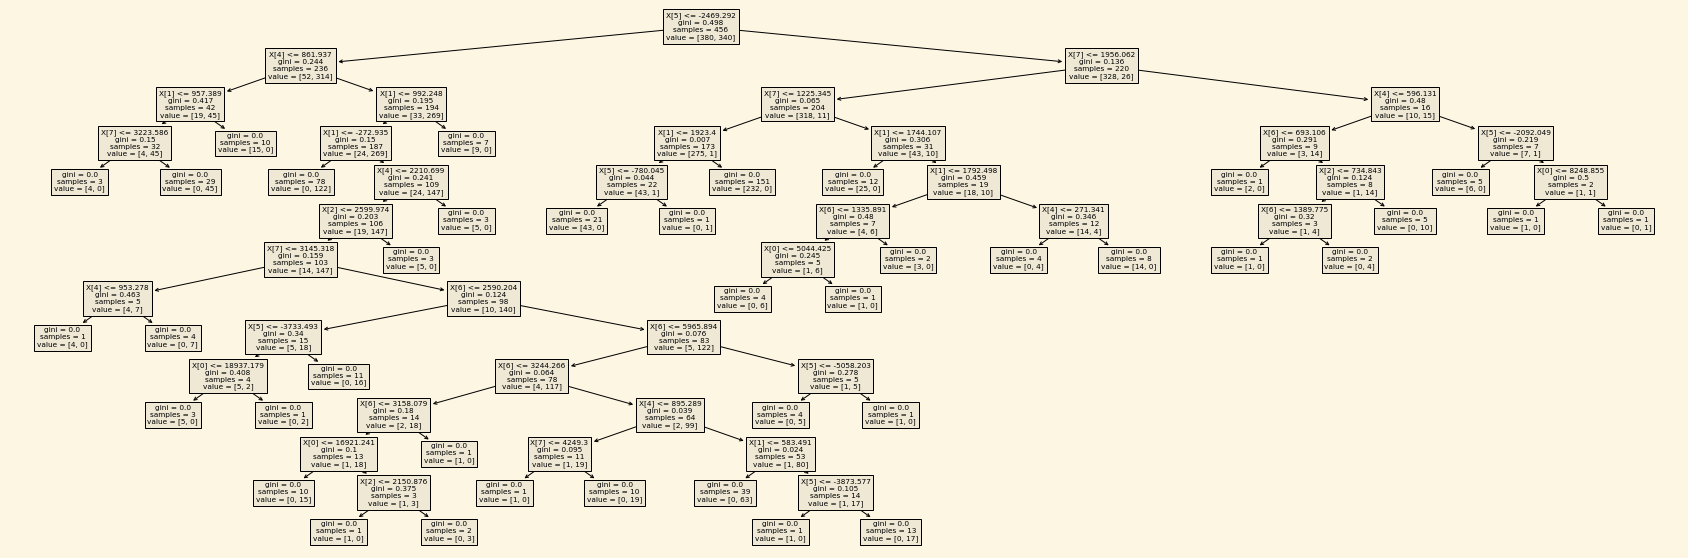

In [73]:
from sklearn import tree
len(log_reg_pca.estimators_)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(log_reg_pca.estimators_[0], filled=False)

# Random Forest Classifier (without PCA)

In [74]:
start_1 = timeit.default_timer()

param_grid={
        'n_estimators' : [100, 200, 500],
        'criterion': ['gini'],
        'max_depth': [10, 50, 100],
        
    }


grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=12, scoring='roc_auc', refit='True', verbose=0)
grid.fit(training_scaled_data, training_targets)

best_n_estimators_not_pca = grid.best_params_['n_estimators']
grid.best_params_

{'criterion': 'gini', 'max_depth': 100, 'n_estimators': 200}

In [75]:
log_reg = RandomForestClassifier(n_estimators=best_n_estimators_pca, criterion="gini", random_state=42, max_depth=grid_pca.best_params_['max_depth'])
log_reg.fit(training_scaled_data, training_targets)

stop_1 = timeit.default_timer()
Time_not_pca= (stop_1-start_1)

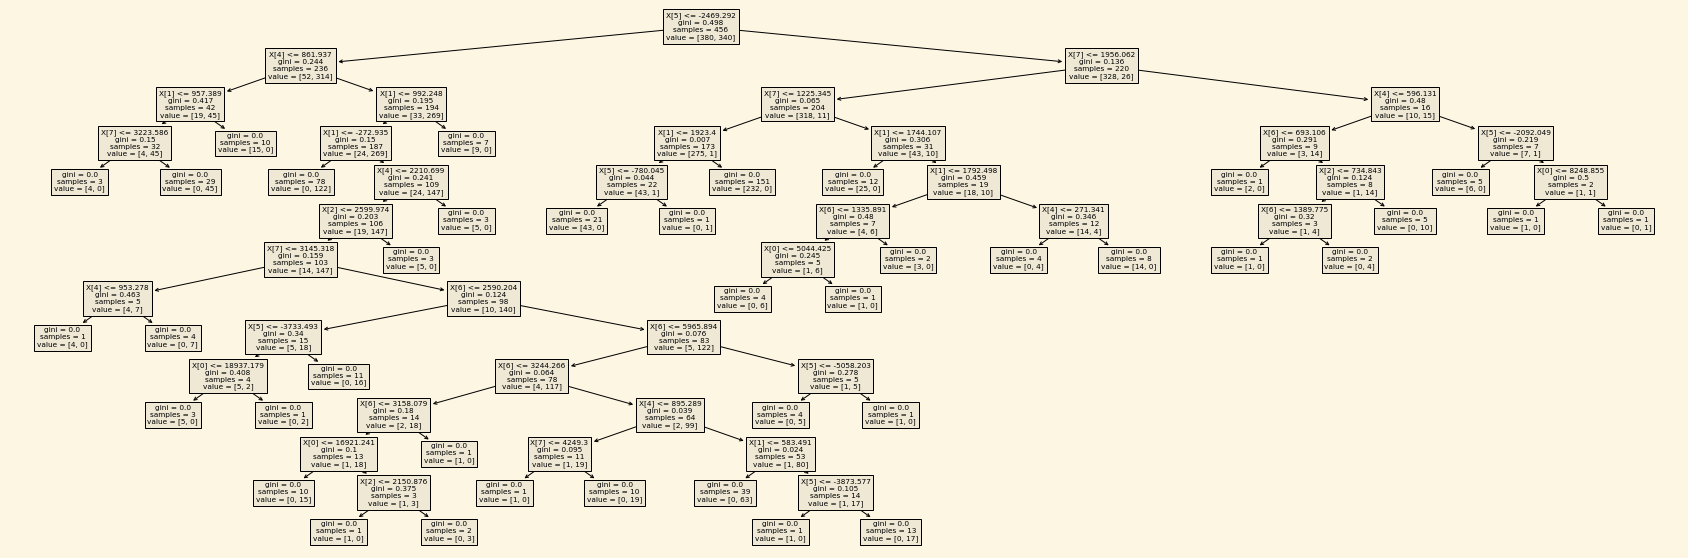

In [76]:
from sklearn import tree
len(log_reg_pca.estimators_)
plt.figure(figsize=(30,10))
_ = tree.plot_tree(log_reg_pca.estimators_[0], filled=False)

# Performance metrics

In [77]:
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [78]:
predictions_pca = log_reg_pca.predict(test_features_pca)
predictions_not_pca = log_reg.predict(test_scaled_data)

In [79]:
mean_squared_error_pca= mean_squared_error(test_targets, predictions_pca)
mean_squared_error_pca

0.03888888888888889

In [80]:
predictions_pca

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0])

In [81]:
accuracy_pca = accuracy_score(test_targets, predictions_pca)
accuracy_pca

0.9611111111111111

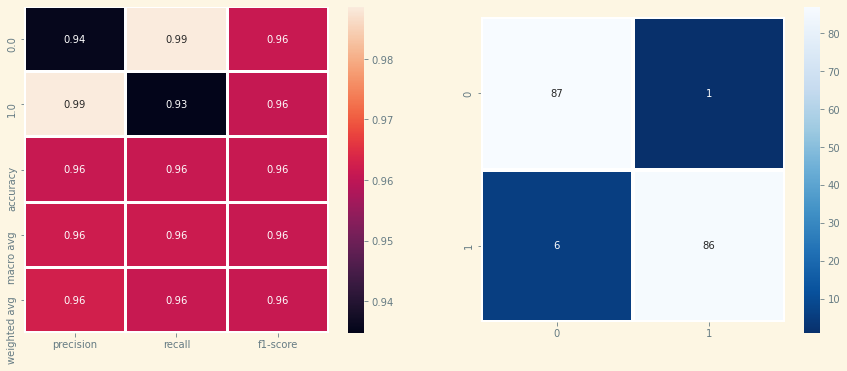

In [82]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

Here I show the classification report including differnt perfomance measures such as recall and f-1 score and the confusion matrix that shows if the model is mislabeling one class as another one.

In [83]:
cross_val_score_train_pca =  cross_val_score(log_reg_pca, training_data_pca, training_targets, cv=10).mean()
print(f'cross_validation_accuracy = {cross_val_score_train_pca}')

cross_validation_accuracy = 0.9680555555555556


In [84]:
cross_val_score_train_pca =  cross_val_score(log_reg_pca, training_data_pca, training_targets, scoring='roc_auc', cv=10).mean()
print(f'cross_validation_roc_auc = {cross_val_score_train_pca}')

cross_validation_roc_auc = 0.9963343402926738


Then I show the same performance measures relative to the LogisticRegression without PCA data.

In [85]:
mean_squared_error_not_pca= mean_squared_error(test_targets, predictions_not_pca)
mean_squared_error_not_pca

0.022222222222222223

In [86]:
accuracy_not_pca = accuracy_score(test_targets, predictions_not_pca)
accuracy_not_pca

0.9777777777777777

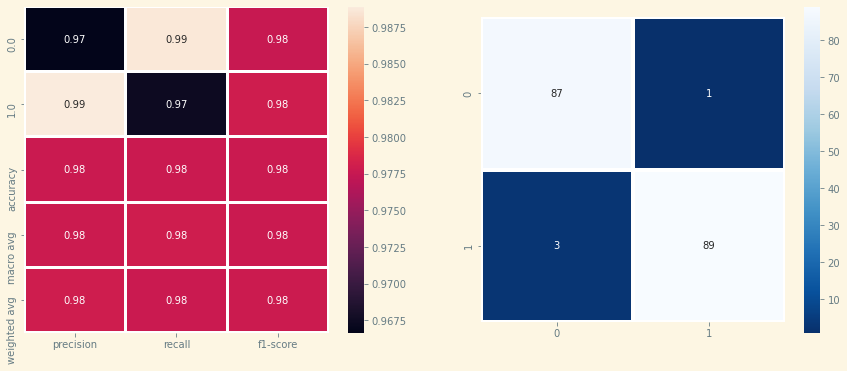

In [87]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
clf_report = classification_report(test_targets, predictions_not_pca, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, linewidths=2, annot=True)

ax2 = fig.add_subplot(122)
cm = confusion_matrix(test_targets, predictions_not_pca)
sns.heatmap(cm, annot=True, linewidths=3, square = True, cmap = 'Blues_r')
plt.show()

In [88]:
cross_val_score_train =  cross_val_score(log_reg, training_scaled_data, training_targets, cv=10).mean()
print(f'cross_validation_accuracy = {cross_val_score_train}')

cross_validation_accuracy = 0.975


In [89]:
cross_val_score_train =  cross_val_score(log_reg, training_scaled_data, training_targets,scoring='roc_auc', cv=10).mean()
print(f'cross_validation_roc_auc = {cross_val_score_train}')

cross_validation_roc_auc = 0.9983794508794508


The accuracy in both cases is pretty high.

# Pipeline strategy

In this section I decided to implement a different strategy in order to find the optimal vallue for the model and the optimal number of principal components:

I use a pipeline to optimize my parameters, including the number of principal components, using GridSearchCV, so that I can also check my results by cross validation.

In [90]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition

In [91]:
start_3 = timeit.default_timer()

sc = StandardScaler() #scaler object

pca = decomposition.PCA() #PCA object

RandomForest = sklearn.ensemble.RandomForestClassifier #RandomForestClassifier object

In [92]:
pipe= Pipeline(steps=[('sc', sc),
                     ('pca', pca),
                     ('classifier', RandomForestClassifier(random_state = 42))])

Here I implemented the pipeline using StandardScaler and PCA:

In [93]:
hyperparameters = { 
                    'classifier__n_estimators': [20, 30, 50],
                    'classifier__max_depth': [2, 4],
                    'classifier__min_samples_leaf': [2, 4]
                  }

These are the parameters to optimize and by using scoring=None in GridSearchCV, the strategy to evaluate performance will be the roc_auc.

In [94]:
clf = GridSearchCV(pipe, hyperparameters, cv=3)

clf.fit(df, targets)

stop_3 = timeit.default_timer()
Time_pipeline= (stop_3-start_3)

In [95]:
print('Best classifier__n_estimators:', clf.best_estimator_.get_params()['classifier__n_estimators'])
print('Best classifier__max_depth:', clf.best_estimator_.get_params()['classifier__max_depth'])
print('Best classifier__min_samples_leaf:', clf.best_estimator_.get_params()['classifier__min_samples_leaf'])
print(); print(clf.best_estimator_.get_params()['classifier'])



Best classifier__n_estimators: 30
Best classifier__max_depth: 4
Best classifier__min_samples_leaf: 2

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=30,
                       random_state=42)


In [96]:
CV_Result = cross_val_score(clf, df, targets, scoring='roc_auc',cv=5, n_jobs=-1)
print(); print('CV_result:', CV_Result)
print(); print('Mean of CV_Result:',CV_Result.mean())
print(); print('Standard Deviation of CV_Result:',CV_Result.std())


CV_result: [0.9837037  0.99432099 0.99679012 0.99111111 0.97987654]

Mean of CV_Result: 0.9891604938271603

Standard Deviation of CV_Result: 0.006397111068748994


I also use cross validation to check the Cross Validation score of our RandomForestClassifier.

# Alternative models

In this section I try to choose an alternative model, based on mean_squared_error, so I randomly split my data again and I perform PCA.

In [97]:
pd.set_option('mode.chained_assignment',None) #to avoid display of chained assignment warning
training_data, test_data = train_test_split(data, test_size=0.20)

training_targets = training_data.iloc[:, 0] 
test_targets =  test_data.iloc[:, 0]

training_data.drop(columns=["class"], inplace=True)
test_data.drop(columns=["class"], inplace=True)

In [98]:
training_targets = training_targets.astype(int)
test_target = test_targets.astype(int)

In [99]:
scaler= StandardScaler()
scaler.fit(training_data)

StandardScaler()

In [100]:
training_scaled_data= pd.DataFrame(scaler.transform(training_data))
test_scaled_data= pd.DataFrame(scaler.transform(test_data))

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier


models=dict()

models["Support Vector Machine Regressor"]=SVR()
models["Gradient Boosting Regressor"]=GradientBoostingRegressor()
models["RandomForestRegressor"]=RandomForestRegressor()
models["RandomForestClassifier"]=RandomForestClassifier()
models["AdaBoost Classifier"]=AdaBoostClassifier()

for model in models:
    model_inuse=models[model].fit(training_scaled_data,training_targets)
    prediction=model_inuse.predict(test_scaled_data)
    print(f"{model}:{mean_squared_error(test_targets,prediction)}")

Support Vector Machine Regressor:0.00941414906122437
Gradient Boosting Regressor:0.007972805791106687
RandomForestRegressor:0.007973504673506477
RandomForestClassifier:0.007973504673506477
AdaBoost Classifier:0.007973504673506477


Random Forest Classifier seems to achieve the lowest MSE.

# Conclusion

In [102]:
print(f'Running time without PCA:{Time_not_pca}')

Running time without PCA:161.70059130000004


In [103]:
print(f'Running time with method of explained_variance:{Time_pca}')

Running time with method of explained_variance:141.68254290000004


In [104]:
print(f'Running time with pipeline method:{Time_pipeline}')

Running time with pipeline method:7.790022000000022
